<a href="https://colab.research.google.com/github/RodrigoDSVDF/Projeto1/blob/main/C%C3%B3pia_de_Untitled26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [53]:
credito = pd.read_csv("/content/Credit.csv")

In [54]:
credito.shape

(1000, 21)

In [55]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [56]:
# Supondo que 'credito' seja o seu DataFrame e 'coluna_desejada' seja o nome da coluna
print(credito['personal_status'].head())


0           'male single'
1    'female div/dep/mar'
2           'male single'
3           'male single'
4           'male single'
Name: personal_status, dtype: object


In [57]:
# condição lógica para ajudar a entender a distribuição dos dados

condicao = (
   (credito['duration'] > 36 ) &  # Duração do empréstimo maior que 48 meses
    credito['num_dependents'].notna() &  # Verifica se 'num_dependents' não é nulo
    credito['class'].isin([ 'bad'])  # Bom ou mau pagador
)

resultados = credito[condicao]

if not resultados.empty:
    print("Resultados encontrados:")
    print(resultados)
else:
    print("Nenhum resultado encontrado com as condições especificadas.")




Resultados encontrados:
    checking_status  duration                    credit_history  \
1          0<=X<200        48                   'existing paid'   
11               <0        48                   'existing paid'   
29               <0        60              'delayed previously'   
35         0<=X<200        45  'critical/other existing credit'   
44               <0        48  'critical/other existing credit'   
63         0<=X<200        48             'no credits/all paid'   
76               <0        42                   'existing paid'   
95         0<=X<200        54             'no credits/all paid'   
116              <0        42                   'existing paid'   
191        0<=X<200        48             'no credits/all paid'   
194        0<=X<200        45                   'existing paid'   
226        0<=X<200        48                   'existing paid'   
242              <0        48             'no credits/all paid'   
273        0<=X<200        48         

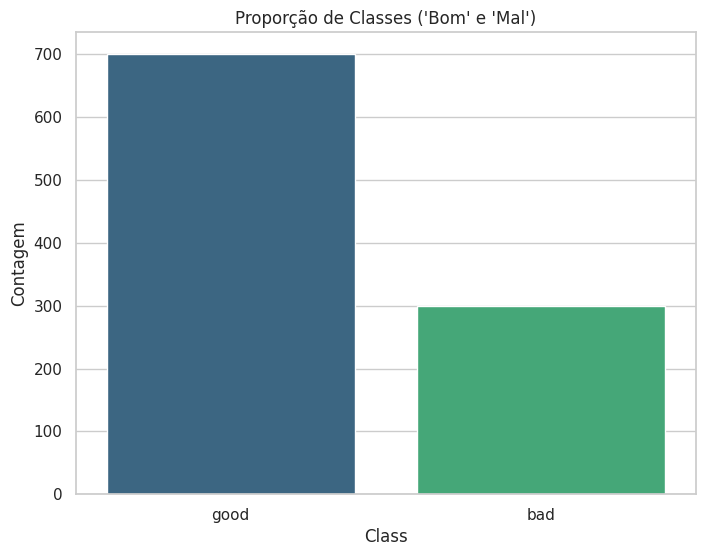

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'credito' seja o seu DataFrame
sns.set(style="whitegrid")  # Define o estilo do gráfico

# Conta a quantidade de cada valor na coluna 'classe'
contagem_classe = credito['class'].value_counts()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_classe.index, y=contagem_classe.values, palette="viridis")

# Adiciona rótulos e título
plt.xlabel("Class")
plt.ylabel("Contagem")
plt.title("Proporção de Classes ('Bom' e 'Mal')")

# Exibe o gráfico
plt.show()


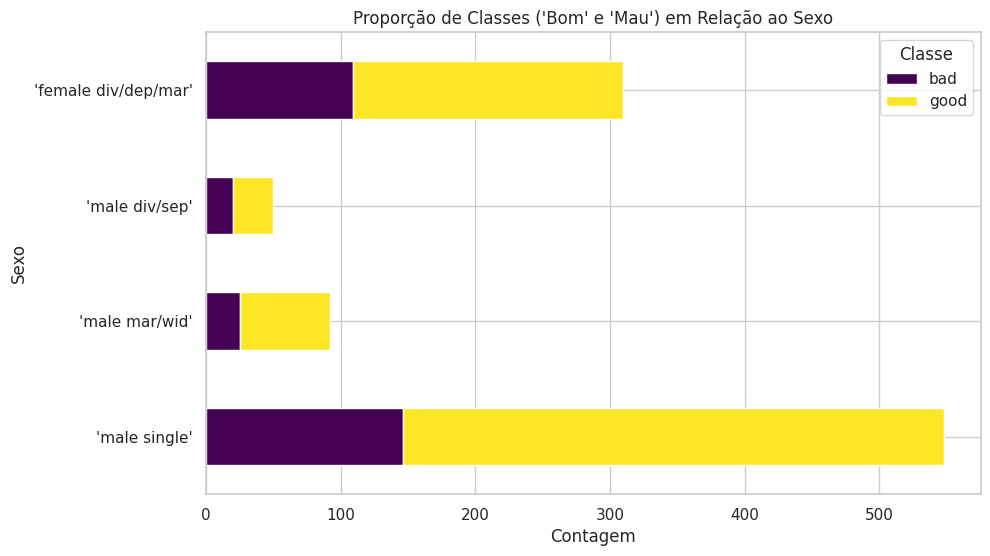

In [61]:


# Supondo que 'credito' seja o seu DataFrame
sns.set(style="whitegrid")  # Define o estilo do gráfico

# Cria um DataFrame com a contagem de 'classe' agrupado por 'sexo'
contagem_sexo_classe = credito.groupby(['personal_status', 'class']).size().unstack()

# Cria o gráfico de barras empilhadas horizontal
contagem_sexo_classe.plot(kind='barh', stacked=True, figsize=(10, 6), colormap="viridis")

# Adiciona rótulos e título
plt.xlabel("Contagem")
plt.ylabel("Sexo")
plt.title("Proporção de Classes ('Bom' e 'Mau') em Relação ao Sexo")

# Adiciona legenda
plt.legend(title="Classe")

# Inverte a ordem dos y-ticks para tornar a visualização mais clara
plt.gca().invert_yaxis()

# Exibe o gráfico
plt.show()


In [62]:
# Supondo que 'credito' seja o seu DataFrame
contagem_sexos = credito['personal_status'].value_counts()

print(contagem_sexos)


'male single'           548
'female div/dep/mar'    310
'male mar/wid'           92
'male div/sep'           50
Name: personal_status, dtype: int64


In [63]:
import numpy as np

# Lista de substrings que indicam gênero masculino
substrings_masculinas = ['male mar/wid', 'male single', 'male div/sep']

# Substitui os valores na coluna 'personal_status' com base nas substrings
credito['personal_status'] = np.where(credito['personal_status'].str.contains('|'.join(substrings_masculinas), case=False), 'male', 'female')


In [64]:
agrupado = credito.groupby(['personal_status']).size()
agrupado

personal_status
female    310
male      690
dtype: int64

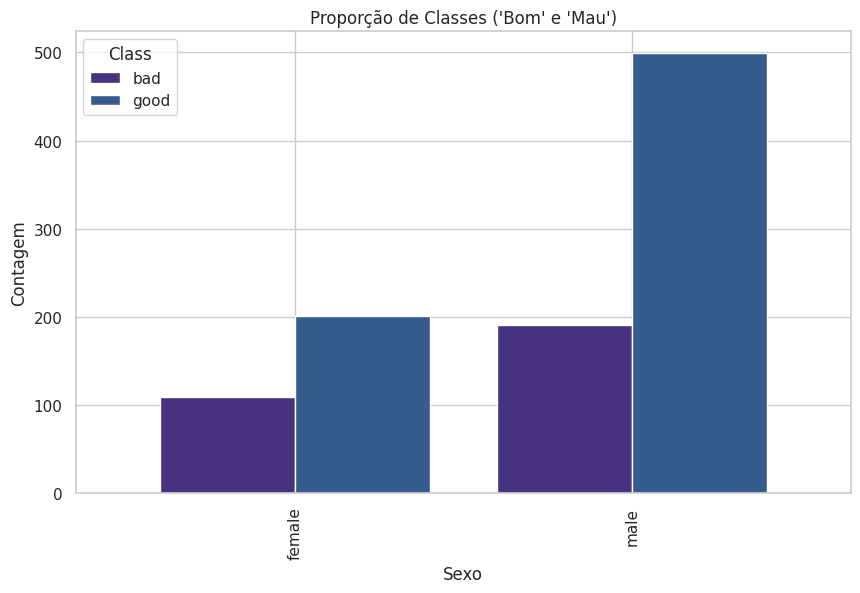

In [65]:
# Configuração de estilo do Seaborn
sns.set(style="whitegrid", palette="viridis")  # Define o estilo do gráfico e a paleta de cores

# Cria um DataFrame com a contagem de 'classe' agrupado por 'sexo'
contagem_sexo_classe = credito.groupby(['personal_status', 'class']).size().unstack()

# Cria o gráfico de barras agrupado
contagem_sexo_classe.plot(kind='bar', figsize=(10, 6), width=0.8)

# Adiciona rótulos e título
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.title("Proporção de Classes ('Bom' e 'Mau')")

# Adiciona legenda
plt.legend(title="Class")

# Exibe o gráfico
plt.show()

<Axes: xlabel='personal_status'>

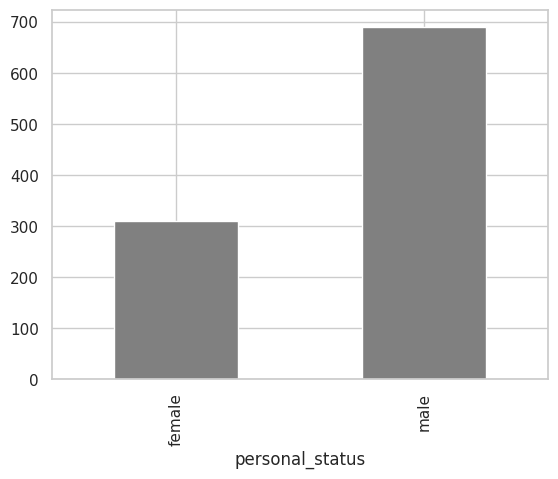

In [66]:
agrupado.plot.bar(color = 'gray')

In [67]:
credito['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

<ipython-input-68-172c665c84da>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'age')

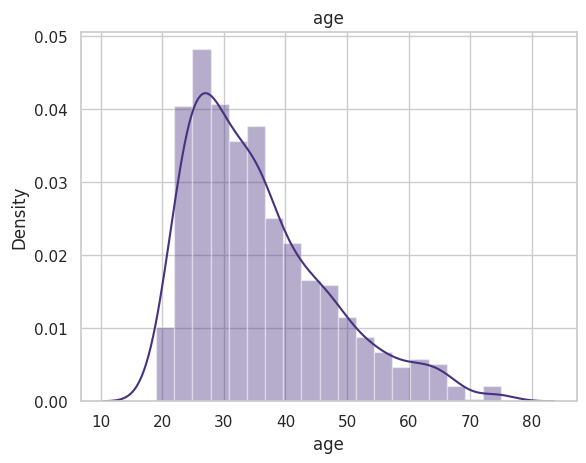

In [68]:
sns.distplot(credito['age']).set_title('age')

In [69]:
agrupado = credito.groupby(['age']).size()
agrupado

age
19     2
20    14
21    14
22    27
23    48
24    44
25    41
26    50
27    51
28    43
29    37
30    40
31    38
32    34
33    33
34    32
35    40
36    39
37    29
38    24
39    21
40    25
41    17
42    22
43    17
44    17
45    15
46    18
47    17
48    12
49    14
50    12
51     8
52     9
53     7
54    10
55     8
56     3
57     9
58     5
59     3
60     6
61     7
62     2
63     8
64     5
65     5
66     5
67     3
68     3
70     1
74     4
75     2
dtype: int64

In [71]:
#verificando se há valores nulos
credito.isnull().sum()



checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

<ipython-input-72-64376e374c7a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




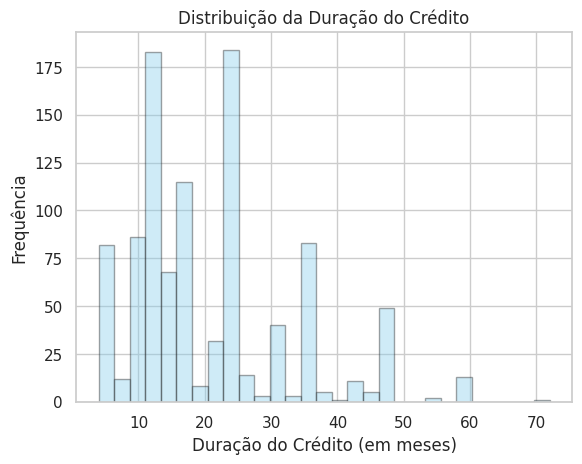

In [72]:
sns.set(style="whitegrid")  # Definindo o estilo do gráfico

# Plotando o gráfico e configurando as propriedades
sns.distplot(credito['duration'], color='skyblue', kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribuição da Duração do Crédito')
plt.xlabel('Duração do Crédito (em meses)')
plt.ylabel('Frequência')
plt.show()







In [73]:
credito['credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

<ipython-input-74-52a1c52226bb>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




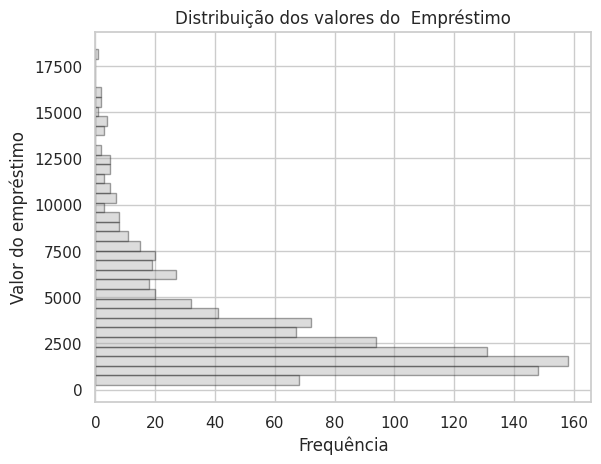

In [74]:
 # Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Plotando o gráfico de forma horizontal com uma cor cinza escura
sns.distplot(credito['credit_amount'], color='darkgray', kde=False, vertical=True, hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribuição dos valores do  Empréstimo')
plt.xlabel('Frequência')
plt.ylabel('Valor do empréstimo')
plt.show()


In [75]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# Supondo que 'credito' seja o seu DataFrame
credit_amount = credito['credit_amount']

# Calculando medidas estatísticas
mean = np.mean(credit_amount)
median = np.median(credit_amount)
std_dev = np.std(credit_amount)
skewness = stats.skew(credit_amount)
kurt = stats.kurtosis(credit_amount)

# Criando um DataFrame para apresentar as estatísticas
estatisticas_df = pd.DataFrame({
    'Média': [mean],
    'Mediana': [median],
    'Desvio Padrão': [std_dev],
    'Assimetria': [skewness],
    'Curtose': [kurt]
})

# Apresentando as estatísticas
print(estatisticas_df)


      Média  Mediana  Desvio Padrão  Assimetria   Curtose
0  3271.258   2319.5    2821.325155    1.946702  4.265163


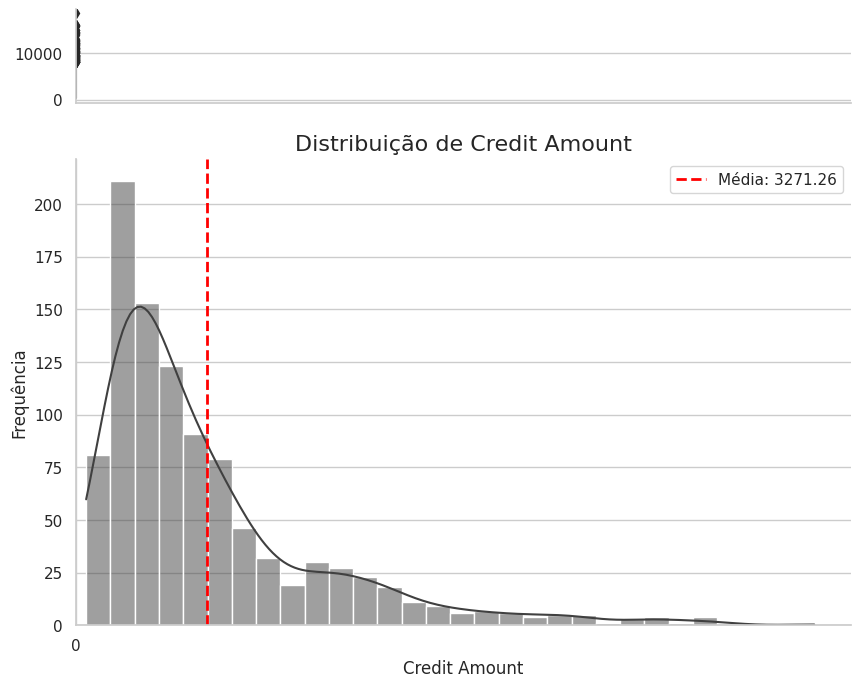

In [76]:


# Configuração de estilo do Seaborn
sns.set(style="whitegrid")

# Criando uma figura com subplots
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)}, figsize=(10, 8))

# Adicionando um boxplot com cor grafite escura
sns.boxplot(credito['credit_amount'], ax=ax_box, color='#404040')
ax_box.set(xlabel='')

# Adicionando um histograma com cor grafite escura
sns.histplot(credito['credit_amount'], bins=30, kde=True, color='#404040', ax=ax_hist)
ax_hist.set(xlabel='Credit Amount', ylabel='Frequência')

# Adicionando uma linha para a média
mean = credito['credit_amount'].mean()
ax_hist.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Média: {mean:.2f}')
ax_hist.legend()

# Adicionando rótulos e título
plt.title('Distribuição de Credit Amount', fontsize=16)

# Ajustando a estética
sns.despine()

plt.show()


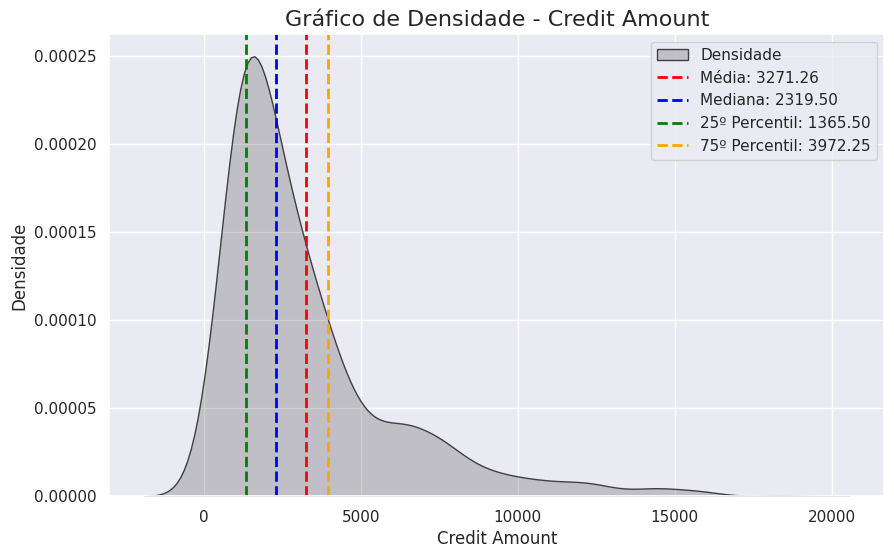

In [77]:


# Configuração de estilo do Seaborn
sns.set(style="darkgrid")

# Criando uma figura
plt.figure(figsize=(10, 6))

# Gráfico de densidade
sns.kdeplot(credito['credit_amount'], fill=True, color='#404040', label='Densidade')

# Adicionando linhas verticais para média, mediana e quartis
mean = credito['credit_amount'].mean()
median = credito['credit_amount'].median()
q25 = credito['credit_amount'].quantile(0.25)
q75 = credito['credit_amount'].quantile(0.75)

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Média: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {median:.2f}')
plt.axvline(q25, color='green', linestyle='--', linewidth=2, label=f'25º Percentil: {q25:.2f}')
plt.axvline(q75, color='orange', linestyle='--', linewidth=2, label=f'75º Percentil: {q75:.2f}')

# Adicionando rótulos e título
plt.title('Gráfico de Densidade - Credit Amount', fontsize=16)
plt.xlabel('Credit Amount')
plt.ylabel('Densidade')

# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.show()


In [78]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [79]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [80]:
# Conversão dos atributos categóricos para atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [81]:
# Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [82]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [83]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização
export_graphviz(arvore, out_file = 'tree.dot')

In [84]:
# Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'b

In [85]:
#matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 42,  44],
       [ 51, 163]])

In [86]:
#taxa acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.6833333333333333

In [87]:
#taxa erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.31666666666666665